[![colab-logo](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/japan-medical-ai/medical-ai-course-materials/blob/master/notebooks/Introduction_to_ML_libs.ipynb)

# 機械学習ライブラリの基礎

ここでは，代表的な機械学習アルゴリズムの紹介とチューニングのポイントを数学的な背景と合わせて紹介していきます．
機械学習の考え方を身に着ける練習として，**単回帰分析**と**重回帰分析**のアルゴリズムを数式と一緒に考えていきましょう．これらを学ぶことで微分と線形代数，統計の使い方が見えてくると思います．重回帰分析は次章で紹介するニューラルネットワークでもその考え方のベースになるところが多いため，しっかりと数式を理解しておきましょう．

## 単回帰分析

まずはじめに，機械学習の中でも最も基礎的な単回帰分析について説明します．機械学習アルゴリズムは，教師あり学習と教師なし学習に大別され，単回帰分析は教師あり学習の一種です．教師あり学習の典型的な問題として，10や0.1のように数値（厳密には連続値）を予測する**回帰**と，赤ワイン or 白ワインのようにカテゴリを予測する**分類**があります．単回帰分析はその名の通り，**回帰**を取り扱う手法で，ひとつの入力変数からひとつの出力変数を予測する機械学習アルゴリズムです．

### 問題設定

例として，**家賃**を予測する問題を考えることにします．ここでは，家賃が出力変数 $y$ となります．
次に，**入力変数として何を採用するか**を考えます．機械学習では，データをもとに学習を行いますが，一番最初にどのデータを使って何を予測させるかは人間側で決めるべき問題です．そのため，入力変数として何を採用するかは，人間側の経験に依存します．家賃の予測では，たとえば部屋の広さ，駅からの距離，犯罪発生率などを，入力変数として検討することができます．ここでは部屋の広さを入力変数 $x$ として採用することにしましょう．実際には，複数の入力変数候補があった際に，それらすべてを扱うことができるようなモデル化が一般的ですが，それはこの次の重回帰分析以降で紹介することにします．

機械学習のアルゴリズムでは，どの手法も大きく分けて次の3ステップで成り立っています．

- Step1: モデルを決める
- Step2: 目的関数を決める
- Step3: 最適なパラメータを求める

参考書を読む際は，「どのようなモデルを用い（定式化を行い）」，「目的関数をどのように決めて」，「どのようにパラメータを最適化するのか」，という3点を意識していきましょう．

### Step1. モデルを決める

まずStep1では**モデル**を決めます．このモデルとは，出力変数 $y$ と入力変数 $x$ の関係性を**定式化**したものです．家賃の予測値を $y$ とした際に，どのように定式化すればうまく予測することができるのでしょうか．このモデル設計は現在は人手で行うのが一般的であり，機械が自動的に決めてくれるわけではありません（最近ではAutoMLなど，モデルも自動決定する研究も進展してきています）

![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/01.png)

例えば，与えられたデータセットにおいて，家賃と部屋の広さの関係性が次のようになっているとしましょう．この場合，部屋が広くなるほど，家賃が高くなるという関係がみられ．予測のために直線を引くのが妥当にみえます．

![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/02.png)

直線の式は $y=ax+b$ で表され，ここで$a$ は傾き，$b$ は切片とよばれるパラメータです ．今回は，直線を引くことが適切であると判断し，Step1のモデルは
$$
y = wx + b
$$

とします．傾き $a$ の箇所が $w$ となっていますが，一般的に機械学習では，傾きの箇所を**重み (weight)** $w$, 切片 $b$ の箇所を**バイアス (bias)** $b$ で表現することが多いため，ほかの参考書が読みやすいように記号も一般的なものに統一しておきましょう．

単回帰分析では，このように直線 $y = wx + b$ と決めて，その重みとバイアスの値をデータにうまくフィットするように調整していきます．この調整すべき変数のことを**パラメータ**と呼びます．今回は $w$ と $b$ がパラメータとなります．

多くの機械学習ではこのようなパラメータで特徴付けられたモデルを使い，与えられたデータセットにあうように最適なパラメータを求めることが目標となります．ここでデータセットは，部屋の広さ $x$ と**教師データ**となる家賃 $t$ の組からなるデータの集まりです（本解説では，機械学習による予測値を $y$ ，教師データとして与えるものを $t$ ，と使い分けているため覚えておいてください）．データセットは $\mathcal{D} = \{x_n, t_n\}_{n=1}^{N}$ として表されることもあります．ここで，添え字 $n$ ($n=1,2,\ldots,N$) は $n$ 番目の物件という意味であり，$N$ は全体の物件数のことです．この $N$ を**サンプル数**と呼ぶため覚えておきましょう．

ここで，この後の計算を楽に進めるために，話は本題から少し逸れますが，**データの中心化**というテクニックを紹介します．下図に示すように，部屋の広さと家賃は両方とも正の値であるため，左のグラフのような形になります．そして，中心化では，**平均を0**とした中央に配置するような変換の処理を施します．この中心化はどのアルゴリズムでも前処理として行うことが一般的です．厳密には前章で紹介した中心化込みのスケーリングがよく用いられます．
![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/03.png)

この中心化の処理自体はそれほど難しいものではないのですが，なぜこのような処理を行う必要があるのでしょうか．それは下図の通り，データの中心化によってバイアス $b$ が0となり，$y_{c} = wx_{c}$ とバイアス成分をなしで表現することができ，調整すべきパラメータを**2つから1つ**に減らすことができるためです．そして，これにより，人間側での手計算が楽になるということが目的です．
![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/04.png)

さて，データの中心化の目的が明確となったところで，このデータの中心化の処理が難しければ，あまり意味がなくなってしまうのですが，何かを簡単にするために，複雑な処理を挟んでしまっては本末転倒です．しかし，データの中心化はいたってシンプルであり，入出力の平均をデータの全体から引くだけです．つまり，
$$
\begin{aligned}
x_{c} &= x - \bar{x} \\
t_{c} &= t - \bar{t}
\end{aligned}
$$

となる．例えば，具体的な数値で見ると，下図の通りです．
![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/05.png)

この処理をプログラムで書くことは容易です．
![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/06.png)

さて，添え字の $c$ に関して，この先も書いていくと表現が冗長となるため，今後はこの添え字 $c$ を省略し，**データの中心化を事前に行っていることを前提**としていきます．この時に単回帰分析のモデルは
$$
y = wx
$$

となります．したがって，単回帰分析の**ゴール**は，データセット $\mathcal{D} = \{x_n, t_n\}_{n=1}^{N}$ に基づいて，パラメータ $w$ を**適切**に調整することです．

### Step2. 目的関数を決める

Step1では決めたゴールには曖昧さが残っていたことに気づかれたでしょうか．それは**適切**という言葉です．一見もっともらしくも聞こえますが，コンピュータで計算させる際には，適切の定義を決めていない中で適切は存在しません．そこで，**適切の定義を決める**必要があり，これを**目的関数**として定めます．分野によっては**評価関数**と呼ばれることもあります．

さて，今回はどのように目的関数を決めれば良いでしょうか．微分の時にもすでに紹介していますが，教師データ $t$ と予測値 $y$ の**二乗誤差** $(t-y)^{2}$ が小さければ小さいほど，適切と考えることができるのではないでしょうか．理想的には二乗誤差が 0 となれば，$t = y$ となり完璧な予測といえます．そのため，$n$ 番目の物件に対する教師データ $t_{n}$ と予測値 $y_{n}$ の二乗誤差は
$$
(t{_n} - y_{n})^{2}
$$

となります．これを全物件で考慮する必要があるため，最終的な目的関数はその総和をとり，
$$
\begin{aligned}
\mathcal{L}&=\left( t_{1}-y_{1}\right)^{2}+\left( t_{2}-y_{2}\right)^{2}+\ldots + (t_{N}-y_{N})^{2} \\
&=\sum^{N}_{n=1}\left( t_{n}-y_{n}\right)^{2}\\
\end{aligned}
$$

となります．また，Step1で決めたモデル
$$
y_{n} = wx_{n}
$$

を代入すると，目的関数は
$$
\mathcal{L}=\sum^{N}_{n=1}\left( t_{n}-wx_{n}\right)^{2}
$$

とパラメータを含んだ形式で表現することができます．目的関数の中でも，教師データと予測値の差（損失）を考慮したものを**損失関数**と呼びます．二乗誤差の総和は代表的な損失関数であるため，覚えておきましょう．損失関数は常に**最小化**したいというモチベーションでパラメータの最適化を行います．

### Step3. 最適なパラメータを求める 

モデルと目的関数が決まると，あとは目的関数 $\mathcal{L}$ を最小化するようなパラメータを求めていくだけです．ここで，ある関数を最小化する点を求める方法としては**微分**が使えることをすでに学びました．そのため，微分を利用して**傾き0**となる点を求めていくだけです．
$$
\begin{aligned}
\dfrac{\partial }{\partial w} \mathcal{L}  &= \dfrac{\partial}{\partial w} { \sum^{N}_{n=1} ( t_{n}-wx_{n})^{2} }\\
\end{aligned}
$$

ここで，微分は**線形性**の性質を持っており，現状ではすべての足し算を終えた後に微分を行っているが，これはそれぞれ微分した後に，それを足し算することでも同じ結果であったため，
$$
\dfrac{\partial}{\partial w} \mathcal{L}=\sum^{N}_{n=1}\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2}
$$

が成り立ちます．この微分と総和 $\sum$ の記号が入れ替わる場面はよくあるので，この理由も含めてしっかりと覚えておきましょう．そして，
$$
\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2}
$$
の部分は**合成関数**になっていることがわかる．$u_{n} = t_{n} - wx_{n}$, $f(u_{n}) = u_{n}^{2}$ とおくと，
$$
\begin{aligned}
\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2} &=  \dfrac {\partial }{\partial w} f(u_{n}) \\
\Rightarrow \dfrac {\partial }{\partial w} f(u_{n}) &= \dfrac {\partial u_{n}}{\partial w} \dfrac{\partial f(u_{n})}{\partial w} \\
&=-x_{n} \times 2 u_{n}  \\
&= -2x_{n}( t_{n}-wx_{n} )
\end{aligned}
$$

が得られる．これより，
$$
\begin{aligned}
\dfrac{\partial }{\partial w} \mathcal{L}
&=\sum^{N}_{n=1}\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2}
\\&=-\sum^{N}_{n=1}2x_{n}\left( t_{n}-wx_{n}\right)
\end{aligned}
$$

となる．この微分の値が0となるように$w$を求めていくと，
$$
\begin{aligned}
\dfrac {\partial }{\partial w} \mathcal{L} &=0\\
-2\sum^{N}_{n=1}x_{n}\left( t_{n}-wx_{n}\right) &=0\\
-2 \sum^{N}_{n=1}x_{n}t_{n} + 2\sum^{n}_{n=1}wx^{2}_{n}&=0\\
-2\sum^{N}_{n=1}x_{n}t_{n}+2w\sum^{N}_{n=1}x^{2}_{n}&=0\\
w\sum^{N}_{n=1}x^{2}_{n}&=\sum^{n}_{n=1}x_{n}t_{n}\\
\Rightarrow w&=\dfrac {\displaystyle  \sum^{N}_{n=1}x_{n}t_{n}}{\displaystyle  \sum^{N}_{n=1}x^{2}_{n}}
\end{aligned}
$$

と求まりました．この求まったパラメータ $w$ を確認すると，与えられたデータセット $\mathcal{D} = \{x_n, t_n\}_{n=1}^{N}$ のみから決定できていることがわかります．最終的なこの式を知っていれば，単回帰分析における学習はプログラミングで1行で書けてしまいますが，この流れを知ってもらうことがこの後に重要になってきます．全体の流れはいかがでしたでしょうか．

数式での議論を進めることができ，もう少し具体的なイメージを持つために，例題にあげていた数値例でパラメータ $w$ を求めてみましょう．まずは，データの中心化をおこなうために，
$$
\begin{aligned}
\bar{x} &= \dfrac{1}{3} (1 + 2 + 3) = 2 \\
\bar{t} &= \dfrac{1}{3}(2 + 3.9 + 6.1) = 4
\end{aligned}
$$
とそれぞれの平均を求め，各変数に対して前処理として，中心化の処理を施すと，
$$
\begin{aligned}
x_{1} &= 1 - 2 = -1 \\
x_{2} &= 2 -2 = 0 \\
x_{3} &= 3- 2 = 1\\
t_{1} &= 2 - 4 = -2\\
t_{2} &= 3.9 - 4 = -0.1\\
t_{3} &= 6.1 - 4 = 2.1 
\end{aligned}
$$
となります．そして，中心化後の値を用いて，最適なパラメータ$w$を導出すると，
$$
\begin{aligned}
w &= \dfrac{\displaystyle \sum_{n=1}^{N}x_{n}t_{n}}{\displaystyle  \sum_{n=1}^{N}x_{n}^{2}} \\
&= \dfrac{x_{1}t_{1} + x_{2}t_{2} + x_{3}t_{3}}{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}} \\
&= \dfrac{-1 \times (-2) + 0 \times 0.1 + 1 \times 2.1}{(-1)^{2} + 0^2 + 1^2} \\
&= 2.05
\end{aligned}
$$
と求まりました．これで単回帰分析の学習の手順が完了しました．この求まったパラメータを使用したモデルが**学習済みモデル**となります．機械学習は学習済みモデルを使用して**推論**を行うことで初めて活用であることを忘れてはいけません．例えば，新しいサンプル $x_{q}=1.5$ となるデータが新たなサンプルとして与えられた時の推論を行うと，
$$
\begin{aligned}
y_{c} &= wx_{c} \\
y_{q} - \bar{t} &= w(x_{q}-\bar{x}) \\
\Rightarrow y_{q} &= w(x_{q}-\bar{x}) + \bar{t} \\
&= 2.05 \times (1.5 - 2) + 4 \\
&= 2.975
\end{aligned}
$$
のように予測値が求まりました．これが機械学習の一連の手順である．単回帰分析自体は本書の中で最もシンプルな方法であるが，全体像を把握することと，微分の使いどころを把握するために，とても良い学びになったと思います．

## 重回帰分析

単回帰分析の延長戦上として，複数の入力変数を扱う際にその基礎となるアルゴリズムが重回帰分析です．重回帰分析は単回帰分析と同様に教師あり学習の一種であり，単回帰分析と同じく回帰を行う手法です．問題設定に関しては，ほとんど単回帰分析と同じですが，重回帰分析では入力変数の数が複数となる．つまり，複数の入力変数から複数の出力変数を予測できるアルゴリズムです．

### 問題設定

ここでは単回帰分析の場合と同様，身近な例で想像がつきやすい**家賃**の予測を考えることとしましょう．つまり家賃が出力変数 $y$ となります．そして，入力変数としては，前回の単回帰分析では考慮しきれていなかった駅からの距離や犯罪発生率なども考慮していきましょう．例えば，部屋の広さ $x_{1}$, 駅からの距離 $x_{2}$, ..., 犯罪発生率 $x_{M}$ のように $M$ 個の入力変数がある前提で話を進めていくこととします．

単回帰分析でも紹介しましたが，どの手法も大きく分けて以下の3つのステップで成り立っています．

- モデルを決める
- 目的関数を決める
- 最適なパラメータを求める

### Step1. モデルを決める

単回帰分析のモデルは，
$$
y = wx + b
$$

でした．ここで，$w$ を重み（weight），$b$ をバイアス (bias) と呼びました．重回帰分析では，この式ベースに複数の入力変数へと拡張し，
$$
y=w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{M}x_{M}+b
$$

のような**線形結合**の形で表します．重回帰分析のモデルは総和を使って整理すると，
$$
y = \sum_{m=1}^{M} w_{m} x_{m} + b
$$

のように書くことができます．ただし，線形代数で学んだ内容をを使うと，さらにすっきりと直感的な式で書くことができます．

その前に，バイアス $b$ がきれいな規則性に沿っていないため，本題から話がそれますが，単回帰分析と同様に，この取り扱いについて先に考えましょう．単回帰分析では，**データの中心化**によってバイアス $b$ を無視できように式変形を行いました．単回帰分析ではそれによって，求めるべきパラメータの数が $w$ の１つだけになり，手計算の量が減るというメリットがありました．しかし，今回 $b$ が省略できたところで，パラメータの数が$M+1$ 個から $M$ 個に減るだけでほとんどメリットがないことに気づきます．そこで，下記のように，バイアス $b$ を $w$ で表現して，同じ規則性で包含できるようにする．

$$
\begin{aligned}
y&=w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{M}x_{M}+b\\
&=w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{M}x_{M}+w_{0} x_{0}\\
&=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}\\
\end{aligned}
$$

ここで，$x_{0}=1$, $w_{0}=b$ です．このようにバイアス $b$ を包含するテクニックは機械学習を学ぶ上でも多く登場するため，覚えておきましょう．そして，この式をベクトルをうまく駆使して整理していくと，
$$
\begin{aligned}
y&=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}\\
&=\begin{bmatrix}
w_{0} & w_{1} & \ldots  & w_{n}
\end{bmatrix}\begin{bmatrix}
x_{0} \\
x_{1} \\
\vdots  \\
x_{M}
\end{bmatrix}\\
&=\boldsymbol{w}^{T}\boldsymbol{x}
\end{aligned}
$$

のように，線形結合で表現できました．また，今後取り扱う際には，$\boldsymbol{x}$ が前に来ているほうが計算上便利であるため，
$$
\begin{aligned}
y&=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}\\
&=\begin{bmatrix}
x_{0} & x_{1} & \ldots  & x_{n}
\end{bmatrix}\begin{bmatrix}
w_{0} \\
w_{1} \\
\vdots  \\
w_{M}
\end{bmatrix}\\
&=\boldsymbol{x}^{T}\boldsymbol{w}
\end{aligned}
$$

として表現します．これが重回帰分析のモデルです．今回はパラメータとして $M+1$ 個の重み $\boldsymbol{w}$ を求めていきます．

### Step2. 目的関数を決める

単回帰分析では，教師データ $t$ と予測値 $y$ の二乗誤差を小さくできるほど，良い予測であると定義して，この**二乗誤差の総和**を目的関数として定めていました．さて，重回帰分析では，これと問題設定が変わるでしょうか．単回帰分析でも重回帰分析でも，家賃 $y$ を求めるという設定は同じであるため，同じ目的関数となるはずです．したがって，
$$
\begin{aligned}
L&=\left( t_{1}-y_{1}\right)^{2}+\left( t_{2}-y_{2}\right)^{2}+\ldots + \left( t_{N}-y_{N}\right)^{2}
\end{aligned}
$$
のように，二乗誤差の総和を単回帰分析同様，目的関数として採用します．単回帰分析では，これを
$$
\mathcal{L}=\sum^{N}_{n=1} ( t_{n} - y_{n})^{2}
$$
のように，総和の記号を使ってまとめていましたが，ここでも線形代数で学んだテクニックを活かして，
$$
\begin{aligned}
\mathcal{L}&=\left( t_{1}-y_{1}\right)^{2}+\left( t_{2}-y_{2}\right)^{2}+\ldots + \left( t_{N}-y_{N}\right)^{2}\\
&=\begin{bmatrix} t_{1} - y_{1} & t_{2}-y_{2} & \ldots & t_{N}-y_{N} \end{bmatrix} \begin{bmatrix}
t_{1}-y_{1} \\
t_{2}-y_{2} \\
\vdots \\
t_{N}-y_{N}
\end{bmatrix}\\
&=\left( \boldsymbol{t}-\boldsymbol{y}\right)^{T}\left( \boldsymbol{t}-\boldsymbol{y}\right) 
\end{aligned}
$$

のようにベクトルをうまく使って表現できました．また，$\boldsymbol{y}$ に関して，Step3に入る前に式を整理しておくと，
$$
\begin{aligned}
\boldsymbol{y}=\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{N}
\end{bmatrix}=\begin{bmatrix}
\boldsymbol{x}_{1}^{T}\boldsymbol{w} \\
\boldsymbol{x}_{2}^{T}\boldsymbol{w} \\
\vdots  \\
\boldsymbol{x}_{N}^{T}\boldsymbol{w}
\end{bmatrix}
=\begin{bmatrix}
\boldsymbol{x}_{1}^{T} \\
\boldsymbol{x}_{2}^{T} \\
\vdots  \\
\boldsymbol{x}_{N}^{T}
\end{bmatrix}
\boldsymbol{w}
\end{aligned}
$$

のように，書くことができます．数式の抽象度が高まり，わかりにくくなってきたため一度展開すると，
$$
\begin{aligned}
\boldsymbol{y}&=
\begin{bmatrix}
x_{10} & x_{11} & x_{12} & \ldots  & x_{1M} \\
x_{20} & x_{21} & x_{22} & \ldots  & x_{2M} \\
\vdots  & \vdots  & \ddots  & \vdots  \\
x_{N0} & x_{N1} & x_{N{2}} & \ldots  & x_{NM}
\end{bmatrix}\begin{bmatrix}
w_{0} \\
w_{1} \\
w_{2} \\
\vdots  \\
w_{M}
\end{bmatrix}\\
\boldsymbol{y}&=\boldsymbol{X}\boldsymbol{w}
\end{aligned}
$$

となっています．ここで，行（横）方向がサンプルを表しており，例えば各物件に対応します．列（縦）方向が入力変数を表しており，例えば，部屋の広さ駅からの距離などが入っています．もう少し具体的な数値で考えると，部屋の広さ50m$^{2}$で駅からの距離600m, 犯罪発生率2%のような $n$ 番目の物件の場合，
$$
\boldsymbol{x}_{n}^{T} = \begin{bmatrix}
1 & 50 & 600 & \cdots & 0.02
\end{bmatrix}
$$

のようにデータが行方向格納されているイメージです．先頭の $1$ はバイアスを包含する際に使用している $x_{0}$ であることに注意しましょう．

### Step3. パラメータを最適化する

それでは，Step1で定めたモデルのパラメータを，Step2で定めた目的関数を最小化するように決めていきましょう．

まずは目的関数に関して，パラメータ $\boldsymbol{w}$ で表現できるように式変形を行うと，
$$
\begin{aligned}
\mathcal{L}&=\left( \boldsymbol{t}-\boldsymbol{y}\right)^{T}\left( \boldsymbol{t}-\boldsymbol{y}\right) \\
&=\left( \boldsymbol{t}-\boldsymbol{X}\boldsymbol{w}\right)^{T}\left( \boldsymbol{t}-\boldsymbol{X}\boldsymbol{w}\right) \\
&= \left\{ \boldsymbol{t}^{T}-(\boldsymbol{X}\boldsymbol{w})^{T}\right\}\left( \boldsymbol{t}-\boldsymbol{X}\boldsymbol{w}\right) \\
&=\left( \boldsymbol{t}^{T}-\boldsymbol{w}^{T}\boldsymbol{X}^{T}\right)\left( \boldsymbol{t}-\boldsymbol{X}\boldsymbol{w}\right)
\end{aligned}
$$

となります．ここで，転置の公式 $(\boldsymbol{A}\boldsymbol{B})^{T} = \boldsymbol{B}^{T}\boldsymbol{A}^{T}$ を使っていることに注意しましょう．さらに分配法則を使って展開を進めていくと，
$$
\begin{aligned}
\mathcal{L}&=\boldsymbol{t}^{T}\boldsymbol{t}-\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w}-\boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{t} + \boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}\\
\end{aligned}
$$

となります．ここに対して微分をしていくのも良いのですが，さらにもう少し整理することができます．この整理には少しテクニックが必要であり，
$$
(1)^T = 1
$$

というように，当然ではありますが，**スカラーは転置しても同じ**であるという性質を持っています．さて，上式の中で出てくる $\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w}$ はスカラー・ベクトル・行列のどれに対応するであろうか．忘れた方は，線形代数の**サイズ感**のパートで確認してください．答えとして，これは**スカラー**です．そのため，
$$
(\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w})^{T} = \boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w}
$$

が成り立ちます．さらに，転置の公式 $(\boldsymbol{A}\boldsymbol{B}\boldsymbol{C})^T = \boldsymbol{A}^T\boldsymbol{B}^T\boldsymbol{C}^T$ より，
$$
(\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w})^T = \boldsymbol{w}^{T} \boldsymbol{X}^{T} \boldsymbol{t}
$$

も成り立ちます．これより，
$$
(\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w})^{T} = \boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w} = \boldsymbol{w}^{T} \boldsymbol{X}^{T} \boldsymbol{t}
$$

を導くことができ，目的関数を
$$
\begin{aligned}
\mathcal{L}=\boldsymbol{t}^{T}\boldsymbol{t}-2\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w} + \boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}\\
\end{aligned}
$$

のように整理することができます．ここで，今回は $\boldsymbol{w}$ に関する偏微分を行っていくため，ひとまず $\boldsymbol{w}$ 以外の定数項をまとめていくと，
$$
\begin{aligned}
\mathcal{L}&=\boldsymbol{t}^{T}\boldsymbol{t}-2\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w}+\boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}\\
&=\boldsymbol{t}^{T}\boldsymbol{t}-2\left( \boldsymbol{X}^{T}\boldsymbol{t}\right)^{T} \boldsymbol{w}+\boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w} \\
&=c+\boldsymbol{b}^{T}\boldsymbol{w}+\boldsymbol{w}^{T}\boldsymbol{A}\boldsymbol{w} 
\end{aligned}
$$

のように，線形代数で学んだ $\boldsymbol{w}$ に関する二次形式（二次関数）で表現することができました．ここで，$\boldsymbol{A}= \boldsymbol{X}^{T}\boldsymbol{X}, \ \boldsymbol{b} =-2 \boldsymbol{X}^{T}\boldsymbol{t}, \ c=\boldsymbol{t}^{T}\boldsymbol{t}$ であり，$\boldsymbol{b}$ を転置の形式にした理由は，線形代数で学んだベクトルで微分の公式の形式に合わせるための工夫です．

それでは，目的関数を最小化することができるパラメータ $\boldsymbol{w}$ の求め方を考えましょう．先述の通り，目的関数はパラメータ $\boldsymbol{w}$に関して二次関数です．例えば，
$$
\begin{aligned}
\boldsymbol{w} = \begin{bmatrix}
w_{1} \\ w_{2}
\end{bmatrix}, 
\boldsymbol{A}=\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix},\boldsymbol{b}=\begin{bmatrix}
1 \\
2
\end{bmatrix},c=1
\end{aligned}
$$

のように具体的な数値例で考えてみると，
$$
\begin{aligned}
\mathcal{L} &=
\boldsymbol{w}^{T}\boldsymbol{A}\boldsymbol{w}+\boldsymbol{b}^{T}\boldsymbol{w}+c\\
&=
\begin{bmatrix}
w_{1} & w_{2}
\end{bmatrix}\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}\begin{bmatrix}
w_{1} \\
w_{2}
\end{bmatrix}
+\begin{bmatrix}
1 & 2
\end{bmatrix}\begin{bmatrix}
w_{1} \\
w_{2}
\end{bmatrix}+1\\
&=
\begin{bmatrix}
w_{1} & w_{2}
\end{bmatrix}
\begin{bmatrix}
w_{1}+2w_{2} \\
3w_{1}+4w_{2}
\end{bmatrix}+w_{1}+2w_{2}+1\\
&=w_{1}\left( w_{1}+2w_{2}\right) +w_{1}\left( 3w_{1}+4w_{2}\right) +w _{1}+2w_{2}+1\\
&=w^{2}_{1}+5w_{1}w_{2}+4w^{2}_{2}+w_{1}+2w_{2}+1 \\
\end{aligned}
$$

となり，$w_{1}, w_{2}$に関してそれぞれまとめると，
$$
\begin{aligned}
\mathcal{L}
&=w^{2}_{1}+\left( 5w_{2}+1\right) w_{1} + 
\left( 4w^{2}_{2}+2w_{2}+1\right) \\
&=4w^{2}_{2}+\left( 5w_{1}+2\right) w_{2}+\left( w^{2}_{1}+w_{1}+1\right) \end{aligned}
$$

のようにそれぞれの二次関数であることがわかります．ただし，$w_{1}$ と $w_{2}$ が**独立である**といった前提もありますが，最初から厳密な前提は数式が複雑になるため，ひとまず置いておくとしましょう．

そして，二次関数であれば，下図のような形となります．
![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/06.png)

これを3次元でイメージすると，下図のようになります．
![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/07.png)

そして，各変数で偏微分して傾きが 0 となる点において，目的関数である二乗誤差の総和が最小となる点となります．
![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/2/08.png)

この例では，$w_{1}$ と $w_{2}$ の２つのパラメータの場合で考えましたが，これは $w_{0}$, $w_{1}$, $w_{2}$, $\ldots$, $w_{M}$ の場合でも同様に考えることができ，目的関数が最小となる点は
$$
\begin{cases}
\dfrac {\partial }{\partial w_{0}}\mathcal{L}=0\\
\dfrac {\partial }{\partial w_{1}}\mathcal{L}=0\\
\ \ \ \ \ \vdots \\
\dfrac {\partial }{\partial w_{M}}\mathcal{L}=0\\
\end{cases}
$$

となり，これをまとめると，
$$
\begin{aligned}
\begin{bmatrix}
\dfrac {\partial}{\partial w_{0}} \mathcal{L} \\
\dfrac {\partial}{\partial w_{1}} \mathcal{L} \\
\vdots  \\
\dfrac {\partial}{\partial w_{M}} \mathcal{L} \\
\end{bmatrix}&=\begin{bmatrix}
0 \\
0 \\
\vdots  \\
0 \\
\end{bmatrix} \\
\Rightarrow \dfrac {\partial}{\partial \boldsymbol{w}} \mathcal{L} &= \boldsymbol{0} \\
\end{aligned}
$$

のようにベクトルでの微分として表されます．あとは，上式を満たすように $\boldsymbol{w}$ を決めていくだけです．下記の計算にはベクトルでの微分をはじめとして，線形代数で学んだ内容をフル活用しているため，計算途中がわからなくなった場合は，線形代数のパートを確認しながら進めてみましょう．
$$
\begin{aligned}
\dfrac {\partial }{\partial \boldsymbol{w}}\mathcal{L} =\dfrac {\partial }{\partial \boldsymbol{w}}\left( c+\boldsymbol{b}^{T}\boldsymbol{w}+\boldsymbol{w}^{T}\boldsymbol{A}\boldsymbol{w}\right)
= \boldsymbol{0}\\
\dfrac {\partial }{\partial \boldsymbol{w}}\left( c\right) +\dfrac {\partial }{\partial \boldsymbol{w}}\left( \boldsymbol{b}^{T}\boldsymbol{w}\right) +\dfrac {\partial }{\partial \boldsymbol{w}}\left( \boldsymbol{w}^{T}\boldsymbol{A}\boldsymbol{w}\right) 
=\boldsymbol{0}\\
\boldsymbol{0}+\boldsymbol{b}+\left( \boldsymbol{A}+\boldsymbol{A}^{T}\right) \boldsymbol{w} =\boldsymbol{0}\\
-2\boldsymbol{X}^{T}\boldsymbol{t}+\left\{ \boldsymbol{X}^{T}\boldsymbol{X} + \left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{T}\right\} \boldsymbol{w}
=\boldsymbol{0}\\
-2\boldsymbol{X}^{T}\boldsymbol{t}+2\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}=\boldsymbol{0}\\
\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}=\boldsymbol{X}^{T}\boldsymbol{t}\\
\end{aligned}
$$

ここで，両辺に左側から $\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}$ をかけると，
$$
\begin{aligned}
\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{X} \boldsymbol{w} =\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{t} \\
\boldsymbol{I}\boldsymbol{w}=\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{t} \\
\boldsymbol{w}=\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{t}
\end{aligned}
$$

となり，最適なパラメータ $\boldsymbol{w}$ が求まりました．ここで，$\boldsymbol{I}$ は単位行列です．このように，最適なパラメータが与えられているデータセット $\boldsymbol{X}, \boldsymbol{t}$ で求まりました．また，式変形の際に気を付ける点として，
$$
\boldsymbol{w} = \dfrac{\boldsymbol{X}^{T}\boldsymbol{t}}{\boldsymbol{X}^{T}\boldsymbol{X}}
$$
のような分数にはならないことに注意しましょう．これは行列の計算には割り算がないためです．そのため，逆行列を使って行列積のみで計算できるように工夫しています．

また，もうひとつよくある間違いとして，
$$
\begin{aligned}
\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}&=\boldsymbol{X}^{T}\boldsymbol{t}\\
\left( \boldsymbol{X}^{T}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}&=\left( \boldsymbol{X}^{T}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{t}\\
\boldsymbol{X}\boldsymbol{w}&=\boldsymbol{t}\\
\boldsymbol{X}^{-1}\boldsymbol{X}\boldsymbol{w}&=\boldsymbol{X}^{-1}\boldsymbol{t}\\
\boldsymbol{w}&=\boldsymbol{X}^{-1}\boldsymbol{t}
\end{aligned}
$$
のように式変形できないのかといった質問もあります．しかし，これは一般的には成立しません．その理由として，線形代数の章で説明した逆行列を持つための条件として，**正方行列であること**が満たされないためです．バイアス $\boldsymbol{b}$ を $\boldsymbol{w}$ に包含することを無視する場合 $\boldsymbol{X} \in \mathcal{R}^{N \times M}$ であり，バイアスの包含を考慮する場合は $\boldsymbol{X} \in \mathcal{R}^{N \times (M+1)}$ です．一般的に，サンプル数 $N$ と入力変数の数 $M$ は等しくないため，$\boldsymbol{X}$は正方行列ではなく，逆行列をもちません．それに対し，例えば，$\boldsymbol{X} \in \mathcal{R}^{N \times M}$ の場合，$\boldsymbol{X}^{T}\boldsymbol{X} \in \mathcal{R}^{M\times M}$ となり，サンプル数 $N$ に依存することなく，常に正方行列となります．また，逆行列が求まるためにはもう少し厳密な条件があるのですが，さらに詳しく知りたい方は**フルランク**と調べてみてください．

推論の際は学習で得られたパラメータ $\boldsymbol{w}$ を用いて，

$$
y_{q} = \boldsymbol{w}^{T}\boldsymbol{x}_{q}
$$

のように計算することで予測値が得られます．



## Numpyによる実装

それでは，重回帰分析を例にPythonで線形代数を用いた実装を行っていきましょう．Pythonには**Numpy**と呼ばれる線形代数を簡単に扱えるライブラリが存在し，これを使うことが実質標準となっています．次の章で紹介するChainerの中でもNumpyは多用されており，ディープラーニングを学ぶための第一歩として，まずはNumpyの使い方を習得することが需要です．

Pythonの文法に関しては把握していることを前提に進めています．具体的には，変数（数値・文字列，リスト，タプル，辞書），制御構文（for，if），関数，クラスを理解している必要があります．

重回帰分析では，最終的に最適なパラメータ $\boldsymbol{w}$ が
$$
\boldsymbol{w}=\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{t}
$$


で求まりました．この最適なパラメータを求めるためには，以下の5つを扱える必要があります．

- ベクトルの定義
- 行列の定義
- 転置
- 行列積
- 逆行列

具体的に，以下のようなデータセットが与えられているケースを想定してみましょう．

$$
\boldsymbol{X} = 
\begin{bmatrix}
1 & 2 & 3 \\
1 & 2 & 5 \\
1 & 3 & 4 \\  
1 & 5 & 9 
\end{bmatrix}, \
\boldsymbol{t} = 
\begin{bmatrix}
1 \\ 5 \\ 6 \\ 8
\end{bmatrix}
$$

それぞれの実装について，見ていきましょう．まずは，Numpyの読み込みから始めます．

In [1]:
import numpy as np

ベクトルの定義は以下のように行います．

In [2]:
t = np.array([[1], [5], [6], [8]])

In [3]:
print(t)

[[1]
 [5]
 [6]
 [8]]


つぎに，行列の定義も行いましょう．

In [4]:
X = np.array([
    [1, 2, 3],
    [1, 2, 5],
    [1, 3, 4],
    [1, 5, 9]
])

In [5]:
print(X)

[[1 2 3]
 [1 2 5]
 [1 3 4]
 [1 5 9]]


それで，Xの転置を行おう．Numpyの`array`で定義されている場合，`.T`をつけるだけで転置ができる．

In [6]:
print(X.T)

[[1 1 1 1]
 [2 2 3 5]
 [3 5 4 9]]


縦と横が入れ替わっていることを確認できた．

次に，行列積は以下のように `np.dot` によって実現できる．

In [7]:
XX = np.dot(X.T, X)

In [8]:
print(XX)

[[  4  12  21]
 [ 12  42  73]
 [ 21  73 131]]


つぎに，この逆行列を求めるには，`np.linalg.inv` を用いる．

In [9]:
XX_inv = np.linalg.inv(XX)

In [10]:
print(XX_inv)

[[ 1.76530612 -0.39795918 -0.06122449]
 [-0.39795918  0.84693878 -0.40816327]
 [-0.06122449 -0.40816327  0.24489796]]


これで重回帰分析のために必要な演算がそろった．最適なパラメータを求めると，

In [11]:
Xt = np.dot(X.T, t)

In [12]:
print(Xt)

[[ 20]
 [ 70]
 [124]]


In [13]:
w = np.dot(XX_inv, Xt)

In [14]:
print(w)

[[-0.14285714]
 [ 0.71428571]
 [ 0.57142857]]


このようにパラメータ $\boldsymbol{w}$ が求まりました．Numpyを使うことで，数式とプログラミングの間にあったギャップを簡単に埋めることができました．

## Scikit-learnによる本格的な実装

重回帰分析であればNumpyで簡単に実装することができましたが，実務で本格的に使用していく機械学習アルゴリズムは複雑なことが多く，初学者が一から書くには難しいことが多いです．そこで，Pythonでは**Scikit-learn**と呼ばれる機械学習用のフレームワークが公開されており，初学者でも簡単に機械学習を扱うことができます．

まずは重回帰分析をScikit-learnによって実装してみましょう．

### Scikit-learn 基礎編

Scikit-learnは`sklearn`という名前で呼び出すことができます．

In [16]:
import sklearn

たとえば，重回帰分析を使用する場合は以下のように呼び出します．

In [19]:
from sklearn.linear_model import LinearRegression

これは[公式のリファレンス](http://scikit-learn.org/)を見ながらどこに格納されているか調べても良いのですが，「重回帰分析 Scikit-learn」と検索して，実例のソースコードを見るほうが早い場合が多いです．

重回帰分析のアルゴリズムがクラスとして定義されており，まずはインスタンス化を行います．

In [21]:
model = LinearRegression()

この一行で重回帰分析を使用するための準備が完了です．そして，パラメータの学習は以下のように行います．

In [22]:
model.fit(X, t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

最後にどのような結果が得られたかの検証も一行で行えます．

In [23]:
model.score(X, t)

0.6923076923076926

回帰では**決定係数**と呼ばれる指標で，分類の場合は**精度**が自動的に計算されるようになっています．
このように，Scikit-learnでは，とても簡単なインターフェースでやり取りができるようになっている．Scikit-learnの良い点は最初にアルゴリズムを決めてしまえば，一からの実装が難しいアルゴリズムでも，`.fit`で学習，`.score`で検証が行える点です．

また，アルゴリズムによって内容は多少異なりますが，パラメータもインスタンス変数として格納されているため，学習後に確認することができます．

In [24]:
# パラメータw
model.coef_

array([[0.        , 0.71428571, 0.57142857]])

In [26]:
# バイアスb
model.intercept_

array([-0.14285714])

この例からわかるように，Scikit-learnでは，パラメータとバイアスがそれぞれ準備されているため，入力変数 $\boldsymbol{X}$ の左端の列に1を格納した変数を入れる必要がありません．

### Scikit-learn 応用編

Scikit-learnは機械学習の実装を支援する多くの機能を兼ね備えており，基礎編では紹介できていなかった実務では必ず使う機能を紹介します．

まず最初にサンプルのデータセットの取り扱いを紹介します．Scikit-learnにサンプルのデータセットがいくつか提供されており，今回はこのデータセットで話を進めていくこととします．今回は`load_boston`というボストン近郊の家賃に関するデータセットを使用しましょう．

In [48]:
from sklearn.datasets import load_boston

In [49]:
boston = load_boston()

変数の`boston`には辞書と同じ形式で格納されており，変数の中身を見ながら入力変数と教師データに対応するものを見つけていきます．

In [51]:
X = boston['data']
t = boston['target']

In [77]:
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [78]:
print(t)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

Numpyの形式で入力変数と教師データが格納されており，`.shape`を使うことで行と列の数を確認できます．

In [79]:
X.shape

(506, 13)

In [80]:
t.shape

(506,)

つぎに，**訓練データ**と**検証データ**の分割を行う必要があります．先ほどは，すべてのデータを訓練に使って，すべてのデータを検証に使っていました．しかし，応用を考えた場合，これで良いのでしょうか．

たとえば，受験勉強のために10年分の過去問を購入した場合，10年分を使って勉強して，実力試し用にまた同じ10年分を使うでしょうか．そうではなく，例えば7年分を勉強用に使って，残りの3年分を実力試し用に置いておくはずです．機械学習もこの考え方と全く同じで，勉強用を訓練データ，実力試しを検証データとして分けて用います．このように分割して検証することを**ホールドアウト法**と呼びます．

Scikit-learnではもちろんこの訓練用と検証用を分割する機能が用意されています．

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [83]:
X_train.shape

(354, 13)

In [84]:
X_test.shape

(152, 13)

引数の`test_size`は検証用に使うデータの比率であり，0.3と指定すると全体の30%が検証データとなります．また，`random_state`は乱数のシードであり，再現性を確保するためのものです．なぜ乱数が登場するかというと，前から70%を訓練用，残りを検証用とするのではなく，全体からランダムに選択した70%を訓練用，残り30%を検証用と並びにかかわらず選択できるようになっているためです．

そして，パラメータの学習には訓練データを用います．

In [85]:
model = LinearRegression()

In [86]:
model.fit(X_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

検証を行う場合は，訓練データと検証データの両方に対してチェックしておきましょう．

In [87]:
# 訓練データ
model.score(X_train, t_train)

0.7644563391821222

In [88]:
# 検証データ
model.score(X_test, t_test)

0.673528086534723

検証データだけでなく，訓練データでも検証することに意味があります．
実務を行うときには，以下のような結果のどれかが得られ，それによって改善していくための施策が変わってきます．

|訓練データ|検証データ|結果|
|:--|:--|:--|
|×|×|アンダーフィッティング|
|〇|×|オーバーフィッティング|
|〇|〇|ＯＫ|

訓練データに対して悪く，検証データで良好な結果が得られている場合はたまたまであり，再現性が低いため，今回は対象外としています．

**アンダーフィッティング**の場合は，現状の機械学習アルゴリズムでうまくデータの特徴を捉えられていないと考えられ，アルゴリズムを変更したり，入力となるデータの特徴を表せるような変換を考えます．逆に**オーバーフィッティング**の時は，そのアルゴリズムである程度特徴を捉えられていることはわかっているため，**ハイパーパラメータ**と呼ばれる各アルゴリズムに固有の値を調整して解決していくことが多いです．望ましい結果が得られない中にも，それぞれの状況を把握し，次に打つべき対策が変わってくるため，訓練データと検証データの両方に対する検証を行うことは重要であることがわかります．．

また，Scikit-learnでは，スケーリングも簡単に行うことができる．例えば，平均0，標準偏差1に変換する処理を施す場合の手順は以下の通りです．

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
# インスタンス化
scaler = StandardScaler()

In [91]:
# 平均の分散（標準偏差）を学習
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
# 変換
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

In [93]:
print(X_train_s)

[[-0.20416267 -0.49997924  1.54801583 ...  1.2272573   0.42454294
   3.10807269]
 [-0.38584317  0.34677427 -0.58974728 ...  0.05696346  0.40185312
  -0.66643035]
 [-0.33266283 -0.49997924  1.54801583 ...  1.2272573   0.39846135
   0.63936662]
 ...
 [-0.38147768 -0.49997924 -0.15303077 ... -0.30312696  0.39659002
  -0.30284441]
 [-0.3720831  -0.49997924 -0.59690657 ... -0.25811566  0.37588849
   0.89967717]
 [-0.38289844 -0.49997924 -1.00641779 ... -0.84326258  0.42454294
   0.31822262]]


In [94]:
print(X_test_s)

[[-0.39152624 -0.49997924 -1.12239824 ... -0.70822867  0.17086147
  -0.72160487]
 [ 0.70825498 -0.49997924  1.00534187 ...  0.77714428  0.0648977
  -0.41177872]
 [-0.38588517 -0.49997924  0.4025299  ... -0.93328518  0.38758427
  -0.27454978]
 ...
 [ 1.6177735  -0.49997924  1.00534187 ...  0.77714428  0.42454294
   2.59876943]
 [-0.34043865 -0.49997924 -0.1687812  ... -0.03305915  0.42454294
  -1.11772962]
 [-0.39601293 -0.49997924 -1.27417512 ...  0.10197476  0.39202867
  -1.02294263]]


## 実用的な機械学習アルゴリズムの紹介

これまでは重回帰分析の紹介にとどまっていたが，ここからは実務でもよく用いられる機械学習アルゴリズムについて特徴とともに紹介していきます．数式を詳細に紹介していくと長くなりすぎてしまうため，気になったアルゴリズムがあれば，参考図書を見て学びを深めてください．

Scikit-learnを使うことによって実装は非常に手軽に行うことができますが，数式を理解していないがゆえに，うまくいかないときの対処法がわからないという問題がありますが，この問題につまずかないように，実務でチューニングを行うハイパーパラメータとその探索する値の相場も併せて紹介していきます．

### Support Vector Machine (SVM)

SVMは実用的によく使われる手法の一つであり，入出力間の非線形性も捉えることができます．$y=x^2$ や $y = \sin(x)$ のように，$y=wx + b$ の直線ではないモデル化を行うことができます．ただし，非線形なモデルの定式化は非常に難しい問題の１つです．なぜなら，$y=wx^2$ が良いのか，$y=w\sin(x)$ が良いのか，それともその重ね合わせが良いのかと組み合わせの候補が無限に存在するためです．物理現象に基づいて入出力間の関係性が把握できていれば定式化のアイディアも存在しますが，そのような事前知識がある場合は多くないはずです．

そこで，SVMでは**カーネルトリック**と呼ばれるテクニックを駆使して，入出力間の関係性が非線形な場合の定式化も可能にしています．この数学は非常に興味深いのですが，初学者には難易度が高いため，ある程度機械学習の数学に慣れてから取り組んで見てください．

参考図書：[オンライン機械学習](https://www.amazon.co.jp/%E3%82%AA%E3%83%B3%E3%83%A9%E3%82%A4%E3%83%B3%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%83%95%E3%82%A7%E3%83%83%E3%82%B7%E3%83%A7%E3%83%8A%E3%83%AB%E3%82%B7%E3%83%AA%E3%83%BC%E3%82%BA-%E6%B5%B7%E9%87%8E-%E8%A3%95%E4%B9%9F/dp/406152903X/ref=sr_1_1?ie=UTF8&qid=1542261385&sr=8-1&keywords=%E3%82%AA%E3%83%B3%E3%83%A9%E3%82%A4%E3%83%B3%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92)

SVMには連続値を予測する**回帰 (Regression)** とカテゴリを予測する**分類 (Classification)** の両方に対応した手法を持っており，それぞれを**，Support Vector Regression (SVR)** と **Support Vector Classification (SVC)** と呼びます．まずは回帰の問題設定で紹介していき，前回のボストン近郊の家賃の予測の例題を取り扱います．

#### Support Vector Regression (SVR)

In [103]:
# データの準備
from sklearn.datasets import load_boston

boston = load_boston()
X = boston['data']
t = boston['target']

In [104]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [105]:
# モデルのインスタンス化，学習
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, t_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [106]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.14680479454958428

In [107]:
# 検証（検証データ）
model.score(X_test, t_test)

0.01018093344367077

このように数式が難しいSVRにおいてもScikit-learnでは重回帰分析のケースとほとんど同じように実装できます．

ここで，結果に着目すると，訓練データに対しても検証データに対しても良い結果が得られているとは言い難いです．
話題に上がっていたハイパーパラメータを調整すれば良くなるのか，それともSVRではそもそもダメなのかと迷うところです．
実はハイパーパラメータの調整の前に，スケーリングを行うことで改善ができることが多く，その効果を見てみましょう．

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [110]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [111]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.697669153907031

In [112]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.5540391127752358

このように，大幅に結果を改善することができた．理由は数式を理解しておかないと説明が難しいが，スケーリングの影響を大きく受けるアルゴリズムと受けないアルゴリズムがあり，SVRを含むSVMは影響を受けるアルゴリズムといえます．

最後に，さらに精度を高められないかとハイパーパラメータの調整を行いましょう．ハイパーパラメータの調整を行うときにはひとつ注意すべき点があり，訓練データ（train）はパラメータの調整に用いますが，検証データ（test）を見ながらハイパーパラーメータの調整を行うべきでしょうか．検証データはあくまで未知の状態に対する予測性能の検証を行うためのものであるため，ハイパーパラメータの調整に使用してしまうとそれは学習に使ってしまうことになります．

そこで，ハイパーパラメータの調整用に**バリデーションデータ**（val）を追加することが一般的です．

![](images/2/09.png)

また，このバリデーションデータの追加と一緒に導入されるものとして，**交差検証法（クロスバリデーション）**があります．話の始まりとしては，trainとtestを分けた時点で学習に使えるサンプル数が少なくなってしまっている中，さらにvalも分けると学習に使えるサンプル数がさらに減ってしまいます．そうなると，valのサンプル数を少なくしたいのですが，バリデーションに使うサンプル数が少ないと，たまたまうまくいっているのか，どのサンプルに対してもうまくいくのかがわからなくなります．そこで，下図に示すような交差検証法が用いられます．

![](images/2/10.png)

trainとvalの分割を1パターンだけでなく，複数パターン分けて行い，その平均をとる方法です．この分割数 $K$ として，**K-fold Cross Validation (CV)**と呼ばれることが多いため，この名称も覚えておこう．上記の例だと $K=3$ です．

それでは，SVRのハイパーパラメータ調整を交差検証法も使いながら行っていきます．Scikit-learnではハイパーパラメータ調整のための機能も`GridSearchCV`という名前で準備されており，**グリッドサーチ**とは各組合せをすべて試す探索方法です．それ以外の方法として，**ランダムサーチ**と**ベイズ最適化**による探索があるが，ここは余裕がでてきた段階でさらに深める内容のひとつとしてほしいトピックのひとつです．

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
]

In [122]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(SVR(), param_grid, cv=3, scoring='neg_mean_squared_error')
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

交差検証法とハイパーパラメータのグリッドサーチもこれだけで完了です．各ハイパーパラメータでの結果ももちろん確認することができ，最も結果の良かったハイパーパラメータの値を引き継いだモデルの選択もできます．

In [126]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -40.88957, std: 12.03388, params: {'C': 1, 'gamma': 0.01},
 mean: -34.94548, std: 12.18057, params: {'C': 1, 'gamma': 0.1},
 mean: -72.62060, std: 15.99632, params: {'C': 1, 'gamma': 1},
 mean: -86.25200, std: 16.38372, params: {'C': 1, 'gamma': 10},
 mean: -17.67763, std: 6.48783, params: {'C': 10, 'gamma': 0.01},
 mean: -16.46703, std: 7.03969, params: {'C': 10, 'gamma': 0.1},
 mean: -43.71719, std: 13.22953, params: {'C': 10, 'gamma': 1},
 mean: -81.13324, std: 15.21847, params: {'C': 10, 'gamma': 10},
 mean: -13.83363, std: 3.54540, params: {'C': 100, 'gamma': 0.01},
 mean: -14.61609, std: 7.20850, params: {'C': 100, 'gamma': 0.1},
 mean: -37.47299, std: 9.87515, params: {'C': 100, 'gamma': 1},
 mean: -77.95797, std: 12.36436, params: {'C': 100, 'gamma': 10}]

In [161]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'C': 10, 'gamma': 0.01}

In [129]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [130]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.7685336670918761

ここまでがアルゴリズムの実践的な調整です．実際には特徴量の選択や外れ値除去など前処理も込みで行うため，ここまでシンプルに完了できるものではないですが，まずはこの流れを覚えてください．

1. スケーリング無　score:0.010
2. スケーリング有　score:0.554
3. スケーリング＋ハイパーパラメータの調整有　0.7685

#### Support Vector Classification (SVC)

次に，SVMの分類であるSVCも同様にスケーリングからハイパーパラメータの調整まで行う．分類の例題では，乳がんの患者か否かといったこれもScikit-learn側で準備されているデータセットを使用する．

In [134]:
# データセットの準備
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = breast_cancer['data']
t = breast_cancer['target']

In [137]:
X.shape

(569, 30)

In [135]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [136]:
print(t)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

入力変数のスケールは統一されていないことがわかります．

In [138]:
# 訓練データと検証データに分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [139]:
# スケーリング無で学習
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, t_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [140]:
# 検証（訓練データ）
model.score(X_train, t_train)

1.0

In [141]:
# 検証（訓練データ）
model.score(X_test, t_test)

0.631578947368421

分類では精度 (Accuracy) と呼ばれる指標の結果が得られます．例えば，100問中3問間違えると，精度は0.97となります．

次にスケーリングを行った後に学習させていきましょう．

In [144]:
# スケーリング
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

In [148]:
# スケーリングしたデータを用いて学習
model.fit(X_train_s, t_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [149]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.9824120603015075

In [150]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9766081871345029

このように精度が大幅に高まったことがわかりました．

最後にハイパーパラメータのチューニングも行っていきましょう．

In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
]

In [156]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(SVC(), param_grid, cv=3)
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [157]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96482, std: 0.01272, params: {'C': 1, 'gamma': 0.01},
 mean: 0.95226, std: 0.01543, params: {'C': 1, 'gamma': 0.1},
 mean: 0.62814, std: 0.00310, params: {'C': 1, 'gamma': 1},
 mean: 0.62563, std: 0.00223, params: {'C': 1, 'gamma': 10},
 mean: 0.97487, std: 0.01972, params: {'C': 10, 'gamma': 0.01},
 mean: 0.94472, std: 0.02474, params: {'C': 10, 'gamma': 0.1},
 mean: 0.63065, std: 0.00132, params: {'C': 10, 'gamma': 1},
 mean: 0.62563, std: 0.00223, params: {'C': 10, 'gamma': 10},
 mean: 0.94975, std: 0.01981, params: {'C': 100, 'gamma': 0.01},
 mean: 0.94472, std: 0.02474, params: {'C': 100, 'gamma': 0.1},
 mean: 0.63065, std: 0.00132, params: {'C': 100, 'gamma': 1},
 mean: 0.62563, std: 0.00223, params: {'C': 100, 'gamma': 10}]

In [162]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'C': 10, 'gamma': 0.01}

In [163]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [164]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9883040935672515

ハイパーパラメータの調整により，多少とはなりましたが改善することができました．

### Random Forest

つぎに，決定木 (Dicision Tree) のアンサンブル学習であるランダムフォレストです．こちらも実用上良く使われる手法であり，ランダムフォレスト含めた決定木系の手法では入力変数のスケールの違いによる影響はほとんど受けないという特徴を持っています．また，**カテゴリカル変数**と呼ばれる定量評価を行うことが難しい変数（例えば，男性 or 女性）も定量化を気にすることなく扱うことができるメリットがあります．回帰と分類と両方準備されているため，それぞれについて紹介していきましょう．

#### 回帰 (Regression)

In [214]:
# データの準備
from sklearn.datasets import load_boston

boston = load_boston()
X = boston['data']
t = boston['target']

In [215]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [216]:
# モデルのインスタンス化，学習
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, t_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [217]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.9683509759630142

In [218]:
# 検証（検証データ）
model.score(X_test, t_test)

0.8244110898822086

In [219]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [220]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [221]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.980773304078463

In [222]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.7568763837538154

このように，スケーリングによる影響はほとんどないこと受けませんでした．

また，Random Forest含めた決定木系の手法では，まずは条件分岐させる数である `max_depth` をハイパーパラメータとして調整することが多いため，今回はこちらを調整していきましょう．

In [1]:
from sklearn.model_selection import GridSearchCV

In [224]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'max_depth': [1, 2, 3, 4, 5, 6]}
]

In [225]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [226]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -41.89307, std: 9.40057, params: {'max_depth': 1},
 mean: -25.95305, std: 8.05238, params: {'max_depth': 2},
 mean: -23.11041, std: 4.68079, params: {'max_depth': 3},
 mean: -17.92487, std: 4.42161, params: {'max_depth': 4},
 mean: -19.30415, std: 7.51230, params: {'max_depth': 5},
 mean: -17.16534, std: 8.32303, params: {'max_depth': 6}]

In [227]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'max_depth': 6}

In [228]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [229]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.8065343207878718

今回はもともとオーバーフィッティングしていなかったため，ハイパーパラメータの調整によって改善することはありませんでしたが，もちろんオーバーフィッティングしているケースには有効な施策であるため，覚えておきましょう．

またランダムフォレストを含めた決定木系の手法の大きなメリットとして，各入力変数がどの程度重要であるかを定量評価した値が得られます．

In [230]:
# 各入力変数の重要度
model.feature_importances_

array([0.03498355, 0.00122218, 0.00721576, 0.00092089, 0.00898805,
       0.39898526, 0.01894469, 0.04598164, 0.00571163, 0.01607173,
       0.01889314, 0.00701622, 0.43506524])

重要度の総和が1になっており，この値を使って考察したり説明できるため，実務でよく見るポイントの一つです．

#### 分類 (Classification)

In [231]:
# データの準備
from sklearn.datasets import load_boston

breast_cancer = load_breast_cancer()
X = breast_cancer['data']
t = breast_cancer['target']

In [232]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [233]:
# モデルのインスタンス化，学習
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, t_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [234]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.9949748743718593

In [235]:
# 検証（検証データ）
model.score(X_test, t_test)

0.9415204678362573

In [236]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [237]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [238]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

1.0

In [239]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9473684210526315

In [240]:
from sklearn.model_selection import GridSearchCV

In [241]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'max_depth': [1, 2, 3, 4, 5, 6]}
]

In [242]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [243]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91206, std: 0.01259, params: {'max_depth': 1},
 mean: 0.93467, std: 0.01763, params: {'max_depth': 2},
 mean: 0.93467, std: 0.01265, params: {'max_depth': 3},
 mean: 0.95226, std: 0.01543, params: {'max_depth': 4},
 mean: 0.93970, std: 0.02119, params: {'max_depth': 5},
 mean: 0.93970, std: 0.01632, params: {'max_depth': 6}]

In [244]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'max_depth': 4}

In [245]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [246]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9590643274853801

In [247]:
# 各入力変数の重要度
model.feature_importances_

array([4.55728165e-03, 4.80674523e-03, 7.04751333e-02, 6.67175039e-02,
       0.00000000e+00, 6.38391868e-03, 1.44783793e-01, 2.56851226e-02,
       1.01592678e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.17633429e-03, 3.57428435e-02, 5.48903143e-05, 7.63635594e-03,
       8.65354259e-03, 3.50041088e-03, 4.29368206e-03, 4.42019691e-03,
       8.32478506e-02, 1.93259510e-02, 1.79759936e-01, 8.96864960e-02,
       4.76915506e-03, 2.20744844e-02, 6.78042092e-02, 1.24987366e-01,
       4.10480850e-03, 8.33606129e-03])

### ロジスティック回帰

シンプルであるが良く使われる手法のひとつです．回帰という名前がついているが，問題設定としては分類に使用する点に注意しましょう．

In [273]:
# データの準備
from sklearn.datasets import load_boston

breast_cancer = load_breast_cancer()
X = breast_cancer['data']
t = breast_cancer['target']

In [274]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [278]:
# モデルのインスタンス化，学習
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [279]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.957286432160804

In [280]:
# 検証（検証データ）
model.score(X_test, t_test)

0.9649122807017544

In [281]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [282]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [283]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.9899497487437185

In [284]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9766081871345029

In [285]:
from sklearn.model_selection import GridSearchCV

In [286]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'C': [0.01, 0.1, 1, 10]}
]

In [287]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(LogisticRegression(), param_grid, cv=3)
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 0.1, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [288]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96985, std: 0.01223, params: {'C': 0.01},
 mean: 0.97990, std: 0.00935, params: {'C': 0.1},
 mean: 0.98492, std: 0.01624, params: {'C': 1},
 mean: 0.97236, std: 0.02323, params: {'C': 10}]

In [289]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'C': 1}

In [290]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [291]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9766081871345029

ロジスティック回帰の特徴は推論の時に出てくるため，違いについて紹介します．

これまでの分類の手法であれば，新しいサンプルが得られた際の予測値は0か1かのカテゴリの値が得られます．Scikit-learnでは推論には`predict`を使用します．

In [297]:
# 訓練データの一番最初のサンプルで試しに推論
x_pred = [X_train_s[0]]
y = model.predict(x_pred)

In [298]:
print(y)

[1]


この結果はどの手法でも同じですが，ロジスティック回帰を含めた**識別モデル**系の手法では，各カテゴリに属する確率まで求めることができます．

In [299]:
y = model.predict_proba(x_pred)

In [300]:
print(y)

[[0.00160119 0.99839881]]


結果からわかる通り，各カテゴリの確率の総和が1となっており，確率が大きいほうのカテゴリ1が選ばれたことがわかります．異常か異常でないかといった分類の場合，異常or異常でないだけでなく，どのくらい異常そうであるかの確率までわかることで，閾値を設けやすくなります．この特性は次の章で紹介するニューラルネットワークでも同じです．

### k-means

最後は教師なし学習である**クラスタリング**の手法として有名なk-meansです．分類では教師データとしてどのカテゴリに属しているかがわかっていたが，クラスタリングではその教師データがない状況で学習を行います．距離的に近いものをまとめるといった特性を持っています．

例題では2つのクラスターをあらかじめ用意しておき，正しく分けられるかを確認していきましょう．

In [336]:
np.random.seed(0)

In [337]:
X1 = np.random.randn(50, 2) - 3
X2 = np.random.randn(50, 2) + 3

In [338]:
# 結合
X = np.r_[X1, X2]

In [339]:
X.shape

(100, 2)

In [340]:
%matplotlib inline
import matplotlib.pyplot as plt

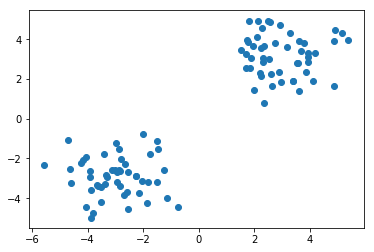

In [341]:
plt.scatter(X[:, 0], X[:, 1])

それでは，k-meansを用いてクラスタリングを行いましょう．クラスタリングでは分けるクラスターの数がハイパーパラメータとして必要であることが一般的であり，`n_clusters`で指定します．

In [344]:
from sklearn.cluster import KMeans

In [347]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

学習したモデルをもとにクラスタリングを行いましょう．

In [350]:
y = model.predict(X)

In [351]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Numpyをうまく使うと，条件に当てはまるサンプルだけを抽出できるため，この機能を使って結果を可視化してみましょう．

In [354]:
X0 = X[y==0]
X1 = X[y==1]

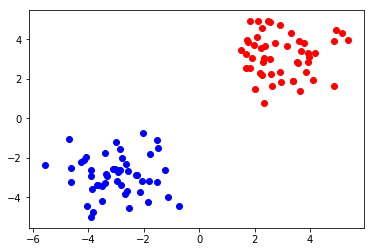

In [356]:
plt.scatter(X0[:, 0], X0[:, 1], color='red')
plt.scatter(X1[:, 0], X1[:,1 ], color='blue')